In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [70]:
data = pd.read_csv('/content/drive/MyDrive/Star type classification/Stars.csv')

In [71]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [72]:
print(data.shape)
print("----"*30)
print(data.columns)
print("----"*30)
print(data.info())
print("----"*31)
print(data.describe().T)
print("----"*31)
print(data["Color"].value_counts())
print("----"*31)
print(data["Spectral_Class"].value_counts())
print("----"*31)
print(data["Type"].value_counts())
print("----"*31)
print(data.groupby(["Color","Spectral_Class"])["Temperature"].mean())
print("----"*31)
print(data.groupby(["Color","Spectral_Class"])["L"].mean())
print("----"*31)
print(data.groupby(["Color","Spectral_Class"])["R"].mean())
print("----"*31)
print(data.groupby(["Color","Spectral_Class"])["A_M"].mean())
print("----"*31)
print(data.groupby(["Color","Spectral_Class"])["Type"].mean())
print("----"*31)
print(df.corr())
print("----"*30)
print(data.isnull().sum())
print("----"*30)

(240, 7)
------------------------------------------------------------------------------------------------------------------------
Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB
None
---------------------------------------------------------------------------------

In [73]:
features = ["Temperature","L","R","A_M"]

In [74]:
corrPearson = data[features].corr(method="pearson")
corrSpearman = data[features].corr(method="spearman")

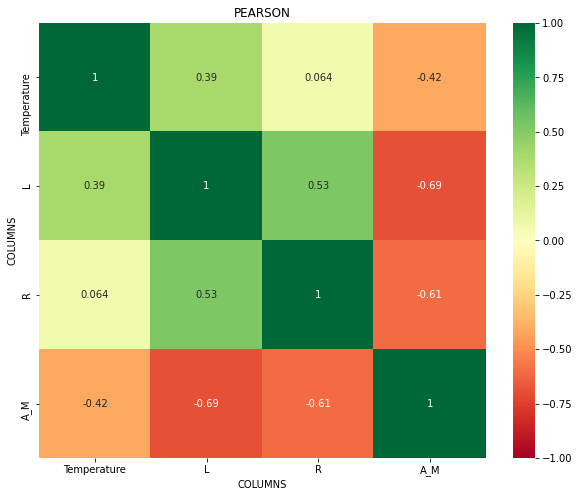

In [75]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

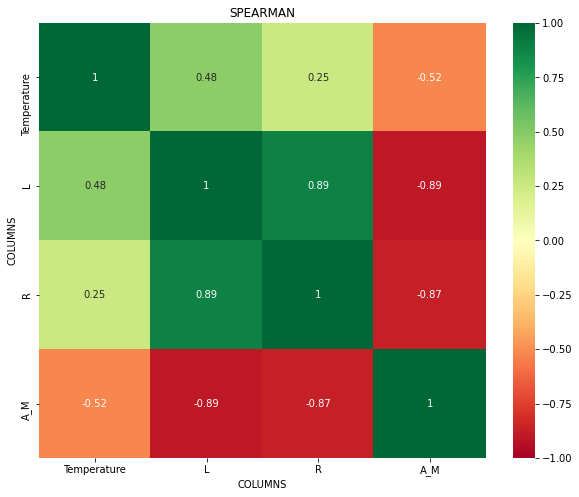

In [76]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("SPEARMAN")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

In [77]:
data_copy = data.copy()

In [78]:
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

Encoding categorical data to numeric data

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()

cat_cols = data.select_dtypes(object)

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [81]:
from sklearn.preprocessing import KBinsDiscretizer

In [82]:
cols_to_bin = ['Temperature', 'L', 'R', 'A_M']

In [83]:
optimal_bins = np.round(1 + np.log2(len(data)))
optimal_bins = int(optimal_bins)
optimal_bins

9

In [84]:
binner = KBinsDiscretizer(n_bins=optimal_bins, encode='ordinal')

for col in cols_to_bin:
    data[col+'_Binned'] = binner.fit_transform(data[col].values.reshape(-1,1)).astype('int64')    

In [85]:
#Splitting data into training and testing sets

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X, y = data.drop('Type', axis=1), data['Type']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [89]:
x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=56)

In [90]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [91]:
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score

In [92]:
def model_selection(x_train_, x_val, y_train_, y_val, model):
  model = model()
  model.fit(x_train_, y_train_)

  pred = model.predict(x_val)

  acc = accuracy_score(y_val, pred)
  error = np.sqrt(mean_squared_error(y_val, pred))
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)

  print('Acc :', acc*100)
  print('\n')
  print('Error:', error)
  print('\n')
  print('Classification report:', report)
  print('\n')
  print('Train Score:', train_score*100)
  print('\n')
  print('Val Score:', val_score*100)
  print('\n')
  print('Is overfitting:', True if train_score>val_score else False)
  print('\n')
  print('Overfitting by:',train_score*100-val_score*100)

In [93]:
extratrees = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreesClassifier)
extratrees

Acc : 94.87179487179486


Error: 0.22645540682891915


Classification report:               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         8

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



Train Score: 100.0


Val Score: 94.87179487179486


Is overfitting: True


Overfitting by: 5.128205128205138


In [94]:
gradient = model_selection(x_train_, x_val, y_train_, y_val, GradientBoostingClassifier)
gradient

Acc : 97.43589743589743


Error: 0.16012815380508713


Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.88      1.00      0.93         7
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00         8

    accuracy                           0.97        39
   macro avg       0.98      0.98      0.98        39
weighted avg       0.98      0.97      0.97        39



Train Score: 100.0


Val Score: 97.43589743589743


Is overfitting: True


Overfitting by: 2.564102564102569


In [95]:
randomforest = model_selection(x_train_, x_val, y_train_, y_val, RandomForestClassifier)
randomforest

Acc : 100.0


Error: 0.0


Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         8

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Train Score: 100.0


Val Score: 100.0


Is overfitting: False


Overfitting by: 0.0


In [96]:
ada = model_selection(x_train_, x_val, y_train_, y_val, AdaBoostClassifier)
ada

Acc : 56.41025641025641


Error: 1.739436985245808


Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.23      1.00      0.37         5
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        10
           5       1.00      1.00      1.00         8

    accuracy                           0.56        39
   macro avg       0.54      0.67      0.56        39
weighted avg       0.47      0.56      0.48        39



Train Score: 70.58823529411765


Val Score: 56.41025641025641


Is overfitting: True


Overfitting by: 14.177978883861243


In [97]:
xgb = model_selection(x_train_, x_val, y_train_, y_val, XGBClassifier)
xgb

Acc : 100.0


Error: 0.0


Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         8

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Train Score: 100.0


Val Score: 100.0


Is overfitting: False


Overfitting by: 0.0


In [98]:
lgbm = model_selection(x_train_, x_val, y_train_, y_val, LGBMClassifier)
lgbm

Acc : 94.87179487179486


Error: 0.22645540682891915


Classification report:               precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         8

    accuracy                           0.95        39
   macro avg       0.95      0.93      0.93        39
weighted avg       0.96      0.95      0.95        39



Train Score: 100.0


Val Score: 94.87179487179486


Is overfitting: True


Overfitting by: 5.128205128205138


In [99]:
tree = model_selection(x_train_, x_val, y_train_, y_val, DecisionTreeClassifier)
tree

Acc : 100.0


Error: 0.0


Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         8

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Train Score: 100.0


Val Score: 100.0


Is overfitting: False


Overfitting by: 0.0


In [100]:
extratree = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreeClassifier)
extratree

Acc : 87.17948717948718


Error: 0.35805743701971643


Classification report:               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       0.82      0.90      0.86        10
           5       0.86      0.75      0.80         8

    accuracy                           0.87        39
   macro avg       0.90      0.88      0.87        39
weighted avg       0.89      0.87      0.87        39



Train Score: 100.0


Val Score: 87.17948717948718


Is overfitting: True


Overfitting by: 12.820512820512818


In [101]:
catboost = model_selection(x_train_, x_val, y_train_, y_val, CatBoostClassifier)
catboost

Learning rate set to 0.071902
0:	learn: 1.6741797	total: 3.9ms	remaining: 3.89s
1:	learn: 1.5542783	total: 7.55ms	remaining: 3.77s
2:	learn: 1.4454771	total: 11.2ms	remaining: 3.73s
3:	learn: 1.3521836	total: 14.8ms	remaining: 3.69s
4:	learn: 1.2567601	total: 18.5ms	remaining: 3.67s
5:	learn: 1.1686710	total: 22.3ms	remaining: 3.7s
6:	learn: 1.0922863	total: 26.1ms	remaining: 3.7s
7:	learn: 1.0256527	total: 30ms	remaining: 3.72s
8:	learn: 0.9682931	total: 33.8ms	remaining: 3.72s
9:	learn: 0.9196615	total: 37.5ms	remaining: 3.71s
10:	learn: 0.8762545	total: 41.2ms	remaining: 3.7s
11:	learn: 0.8261416	total: 44.8ms	remaining: 3.69s
12:	learn: 0.7826045	total: 48.5ms	remaining: 3.68s
13:	learn: 0.7524760	total: 52.2ms	remaining: 3.68s
14:	learn: 0.7118868	total: 55.9ms	remaining: 3.67s
15:	learn: 0.6754203	total: 59.7ms	remaining: 3.67s
16:	learn: 0.6477038	total: 63.3ms	remaining: 3.66s
17:	learn: 0.6215201	total: 67ms	remaining: 3.65s
18:	learn: 0.5933023	total: 70.6ms	remaining: 3.64s


In [102]:
sgd = model_selection(x_train_, x_val, y_train_, y_val, SGDClassifier)
sgd

Acc : 41.02564102564102


Error: 0.9870962335856491


Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.22      1.00      0.36         4
           3       1.00      0.29      0.44         7
           4       0.53      1.00      0.69        10
           5       0.00      0.00      0.00         8

    accuracy                           0.41        39
   macro avg       0.29      0.38      0.25        39
weighted avg       0.34      0.41      0.29        39



Train Score: 39.869281045751634


Val Score: 41.02564102564102


Is overfitting: False


Overfitting by: -1.1563599798893875


In [103]:
nb = model_selection(x_train_, x_val, y_train_, y_val, GaussianNB)
nb

Acc : 76.92307692307693


Error: 0.4803844614152614


Classification report:               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5
           2       0.50      1.00      0.67         4
           3       0.75      0.43      0.55         7
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00         8

    accuracy                           0.77        39
   macro avg       0.74      0.75      0.73        39
weighted avg       0.80      0.77      0.77        39



Train Score: 88.88888888888889


Val Score: 76.92307692307693


Is overfitting: True


Overfitting by: 11.965811965811952


In [104]:
svc = model_selection(x_train_, x_val, y_train_, y_val, SVC)
svc

Acc : 15.384615384615385


Error: 1.1435437497937313


Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.20      1.00      0.33         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        10
           5       0.15      0.25      0.19         8

    accuracy                           0.15        39
   macro avg       0.06      0.21      0.09        39
weighted avg       0.05      0.15      0.07        39



Train Score: 37.908496732026144


Val Score: 15.384615384615385


Is overfitting: True


Overfitting by: 22.523881347410757
